In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
boston=load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = boston.data
Y = boston.target
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [6]:
#addin additional feauture to reduce y=mx+B to y=mx by adding ones to all rows(Andrew ng machine learning course fron course era)
b=np.ones(boston.data.shape[0])
X= np.vstack((b,X.T)).T

In [7]:
X.shape

(506, 14)

In [8]:
Y=Y.reshape(-1,1)
Y.shape

(506, 1)

In [9]:
# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(354, 14) (354, 1)
(152, 14) (152, 1)


In [10]:
weights=np.random.normal(0,1,X.shape[1])
w=np.asmatrix(weights)
w.shape


(1, 14)

# Implement  manual sgd in linear regression

In [11]:
lr=0.001#learning rate
iter=100000
while (iter>=0):
    #https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array
    idx = np.random.randint(X_train.shape[0], size=50)#creation a array of random numbers of size 50 below x_train.shape[0]
    x=X_train[idx,:]
    y=y_train[idx]
    #loss function with respect to x
    dm=(-2)*(x.T*(y-(w*x.T).T))/50
    #w_new = dm * lr
    w1 =w.T - (dm *lr)
    w=w1.T
    iter-=1
manual_sgd_weights=w

In [12]:
manual_sgd_y=(w*X_test.T).T
y.shape

(50, 1)

Text(0,0.5,'y_pred_manual_sgd')

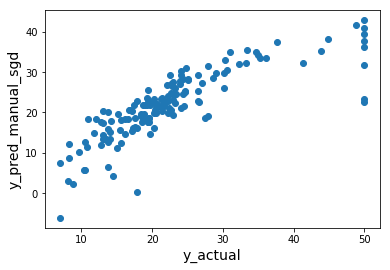

In [13]:
plt.scatter(np.asarray(y_test),np.asarray(manual_sgd_y))
plt.xlabel('y_actual',size=14)
plt.ylabel('y_pred_manual_sgd',size=14)

# Sklearn SGD implementation

In [14]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
clf = SGDRegressor(penalty='none', max_iter=100000, learning_rate='constant' , eta0=0.001 ) 
clf.fit(X_train, y_train) 
print(mean_squared_error(y_test, clf.predict(X_test)))
sklearn_sgd_predictions=clf.predict(X_test)
sklearn_weights=clf.coef_

31.056738814479033


In [15]:
y_test.shape

(152, 1)

In [16]:
sklearn_sgd_predictions.shape

(152,)

Text(0,0.5,'y_pred from sklearn sgd')

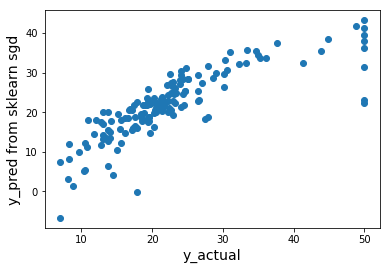

In [17]:
plt.scatter(np.asarray(y_test),np.asarray(sklearn_sgd_predictions))
plt.xlabel('y_actual',size=14)
plt.ylabel('y_pred from sklearn sgd',size=14)

# Comparing manual and sklearn sgd weights

In [18]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable
#creating a list of numbers to show weight numbers
numbering = [i+1 for i in range(w.shape[1])]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",manual_sgd_weights.T)
ptable.add_column("Weights of Sklearn's SGD",sklearn_weights)

# Printing the Table
print(ptable)

+-------+-----------------------+--------------------------+
| S.NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |    [[22.33698033]]    |    11.192496177010181    |
|   2   |    [[-1.30474574]]    |   -1.3491276541662784    |
|   3   |     [[0.96046917]]    |    0.9732135907672868    |
|   4   |    [[-0.18808726]]    |   -0.19216547131742745   |
|   5   |     [[0.18914757]]    |    0.1930969361150166    |
|   6   |    [[-1.53337678]]    |   -1.5164548504318893    |
|   7   |     [[2.78496419]]    |    2.8270956001093968    |
|   8   |    [[-0.25638947]]    |   -0.3065008264742546    |
|   9   |    [[-2.81090038]]    |   -2.7918314672049416    |
|   10  |     [[2.80558592]]    |    2.7470282143654705    |
|   11  |     [[-2.1241251]]    |   -2.1584162195450074    |
|   12  |    [[-2.13424809]]    |   -2.1330987773643684    |
|   13  |     [[1.1402406]]     |    1.1820379642417334    |
|   14  |    [[-3.340142

# SCATTER PLOT CONTAINING MANUAL AND SGD PREDICTIONS

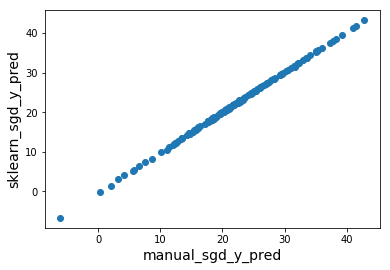

In [19]:
plt.scatter(np.asarray(manual_sgd_y),np.asarray(sklearn_sgd_predictions))
plt.xlabel('manual_sgd_y_pred',size=14)
plt.ylabel('sklearn_sgd_y_pred',size=14)
plt.show()

In [20]:
print(mean_squared_error(y_test, manual_sgd_y))
print(mean_squared_error(y_test, clf.predict(X_test)))

30.59634735745196
31.056738814479033


# OBSERVATIONS

1).From graph between y predicted manual and y predicted sklearn one can say that both are giving approximately same results.
<br>
2).caluculated mean_squared errors obtained from both the mthods are approximately same.
<br>
3).weights obtained from both the methods are almost same except w0.


# Procedure Followed

1).load the boston data.
<br>
2).Equate the independent variables boston.data as X and dependent variable boston.target as 
<br>
3).standardize the data and split the data in to text and train.
<br>
4).intialize the weight vector.
<br>
5).implement manual SGD on linear regression and store the weight vector obtained after perfoming sgd.
<br>
6).plot y actual vs y_pred_manual_sgd
<br>
5).implement sklearn's SGD on linear regression and store the weight vector obtained after perfoming sgd.
<br>
6).plot y actual vs y_pred_sklearn's_sgd
<br>
7).compare manual and sklean weights using pretty table.
<br>
8).plot y_predicted_manual vs y_predicted_sklearn.
<br>
9)compare mean squared value of both the methods and note down the obserbvations.